In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.1'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("C:/Users/kdipu/Downloads/archive (2) (1)/Covid19-dataset/train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 251 images belonging to 3 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("C:/Users/kdipu/Downloads/archive (2) (1)/Covid19-dataset/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 66 images belonging to 3 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
8/8 [==============================] - 38s 5s/step - loss: 1.0429 - accuracy: 0.5060 - val_loss: 0.7964 - val_accuracy: 0.5455
Epoch 2/50
8/8 [==============================] - 27s 4s/step - loss: 0.7425 - accuracy: 0.7052 - val_loss: 0.6140 - val_accuracy: 0.8030
Epoch 3/50
8/8 [==============================] - 32s 4s/step - loss: 0.5097 - accuracy: 0.7968 - val_loss: 0.5082 - val_accuracy: 0.8030
Epoch 4/50
8/8 [==============================] - 25s 3s/step - loss: 0.4552 - accuracy: 0.8088 - val_loss: 0.4329 - val_accuracy: 0.8182
Epoch 5/50
8/8 [==============================] - 30s 4s/step - loss: 0.3524 - accuracy: 0.8645 - val_loss: 0.4554 - val_accuracy: 0.8333
Epoch 6/50
8/8 [==============================] - 28s 4s/step - loss: 0.3822 - accuracy: 0.8526 - val_loss: 0.3602 - val_accuracy: 0.8636
Epoch 7/50
8/8 [==============================] - 30s 4s/step - loss: 0.3039 - accuracy: 0.8964 - val_loss: 0.4136 - val_accuracy: 0.7424
Epoch 8/50
8/8 [==================

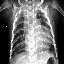

In [14]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/kdipu/Downloads/archive (2) (1)/Covid19-dataset/test/Viral Pneumonia/0111.jpeg", target_size = (64, 64))
test_image







In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("C:/Users/kdipu/Downloads/archive (2) (1)/Covid19-dataset/test/Viral Pneumonia/0111.jpeg" , target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 3:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'covid'
    
elif j == 1:
 prediction = 'normal'
elif j == 2:
 prediction = 'viral'


1/1 [==============================] - 2s 2s/step
2


In [16]:
print(prediction)

viral


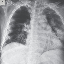

In [17]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:/Users/kdipu/Downloads/archive (2) (1)/Covid19-dataset/test/Covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg", target_size = (64, 64))
test_image


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img("C:/Users/kdipu/Downloads/archive (2) (1)/Covid19-dataset/test/Covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg" , target_size = (64, 64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)


result = cnn.predict(test_image)

result=result.astype(int)
Y=training_set.class_indices
j=0
i = 0
while i < 3:
    
    if result[0][i] == 1:
        break
    i=i+1
print(i)
j=i
if j == 0:
 prediction = 'covid'
    
elif j == 1:
 prediction = 'normal'
elif j == 2:
 prediction = 'viral'

1/1 [==============================] - 0s 21ms/step
0


In [19]:
print(prediction)

covid
